In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
knn_eval = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0}
dtree_eval = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0}
randomf_eval = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0}
logisticr_eval = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0}
bayes_eval = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0}
xgboost_eval = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0}
mlp_eval = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0}

def Predict(algorithmName,model, X_test, y_test):
    y_predict = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predict)
    precision = metrics.precision_score(y_test, y_predict)
    recall =  metrics.recall_score(y_test, y_predict)
    f1 = metrics.f1_score(y_test, y_predict)
    print(classification_report(y_test, y_predict))
    if(algorithmName == "K-NN"):
        knn_eval['accuracy'] = accuracy
        knn_eval['precision'] = precision
        knn_eval['recall'] = recall
        knn_eval['f1'] = f1
    if(algorithmName == "Decision Tree"):
        dtree_eval['accuracy'] = accuracy
        dtree_eval['precision'] = precision
        dtree_eval['recall'] = recall
        dtree_eval['f1'] = f1
    if(algorithmName == "Random Forest"):
        randomf_eval['accuracy'] = accuracy
        randomf_eval['precision'] = precision
        randomf_eval['recall'] = recall
        randomf_eval['f1'] = f1
    if(algorithmName == "Logistic Regression"):
        logisticr_eval['accuracy'] = accuracy
        logisticr_eval['precision'] = precision
        logisticr_eval['recall'] = recall
        logisticr_eval['f1'] = f1
    if(algorithmName == "Naive Bayes"):
        bayes_eval['accuracy'] = accuracy
        bayes_eval['precision'] = precision
        bayes_eval['recall'] = recall
        bayes_eval['f1'] = f1
    if(algorithmName == "XGBoost"):
        xgboost_eval['accuracy'] = accuracy
        xgboost_eval['precision'] = precision
        xgboost_eval['recall'] = recall
        xgboost_eval['f1'] = f1
    if(algorithmName == "MLPClassifier"):
        mlp_eval['accuracy'] = accuracy
        mlp_eval['precision'] = precision
        mlp_eval['recall'] = recall
        mlp_eval['f1'] = f1
    #draw Confusion Matrix figure
    confusion_matrix = metrics.confusion_matrix(y_predict, y_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True,fmt='.20g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix Of '+ algorithmName)
    plt.show()
    #draw ROC figure
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Of '+ algorithmName)
    plt.legend(loc="lower right")
    plt.show()
    #draw PRC figure
    average_precision = average_precision_score(y_test, model.predict_proba(X_test)[:,1])
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve: AP={0:0.2f}'.format(average_precision) + " Of " + algorithmName)
    plt.show()

def Knn(X_train,y_train,X_test,y_test):
    knn = KNeighborsClassifier(n_neighbors = 15)
    knn.fit(X_train,y_train)
    Predict("K-NN",knn,X_test,y_test)

def DecisionTree(X_train,y_train,X_test,y_test):
    decisiontree = tree.DecisionTreeClassifier(random_state=0)
    decisiontree.fit(X_train,y_train)
    Predict("Decision Tree",decisiontree,X_test,y_test)

def RandomForest(X_train,y_train,X_test,y_test):
    randomforest = RandomForestClassifier(random_state=0)
    randomforest.fit(X_train,y_train)
    Predict("Random Forest",randomforest,X_test,y_test)

def LogisticR(X_train,y_train,X_test,y_test):
    logre = LogisticRegression()
    logre.fit(X_train,y_train)
    Predict("Logistic Regression",logre,X_test,y_test)

def NaiveBayes(X_train,y_train,X_test,y_test):
    bayes = GaussianNB()
    bayes.fit(X_train,y_train)
    Predict("Naive Bayes",bayes,X_test,y_test)

def XGBoost(X_train,y_train,X_test,y_test):
    xgboost = XGBClassifier(eval_metric= 'error')
    xgboost.fit(X_train,y_train)
    Predict("XGBoost",xgboost,X_test,y_test)

def NeuralNetwork(X_train,y_train,X_test,y_test):
    mlp=MLPClassifier(solver='adam',alpha=1e-5,hidden_layer_sizes=(10,5))
    mlp.fit(X_train,y_train)
    Predict("MLPClassifier",mlp,X_test,y_test)

In [3]:
# Dataset preprocessing
dataset = pd.read_csv('cleaned_heart_data.csv')

dataset = dataset.drop(columns =['State'], axis = 1)
dataset = dataset.drop(columns =['HadHeartAttack'], axis = 1)

In [4]:
columns_to_convert = ['PhysicalActivities',"HadAngina","HadStroke","HadAsthma","HadCOPD","HadKidneyDisease","HadArthritis","AlcoholDrinkers"]
for column in columns_to_convert:
    dataset[column] = dataset[column].str.strip().str.lower().replace({'yes': 1, 'no': 0})
dataset['Sex'].replace({'Male': 1, 'Female': 0},inplace=True)
dataset['GeneralHealth'].replace({'Excellent': 3, 'Very good': 2, 'Good': 1, 'Fair': 0, 'Poor': -1},inplace=True)
dataset['SmokerStatus'].replace({"Never":0,'Sometimes':1,'Former':2,"Everyday":3},inplace=True)
dataset['AgeCategory'].replace({'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80+':12},inplace=True)
dataset['SleepCategory'].replace({'Very Short':0,'Short':1,'Recommended':2,'Long':3,'Very Long':4},inplace=True)

In [5]:
data_majority = dataset[dataset.iloc[:, -1] == 0]
data_minority = dataset[dataset.iloc[:, -1] == 1]
data_downsampled = resample(data_majority, replace=False, n_samples=len(data_minority), random_state=376)
dataset = pd.concat([data_downsampled,data_minority])

In [6]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1959)

In [7]:
# Feature scaling
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      4018
           1       0.79      0.75      0.77      3992

    accuracy                           0.78      8010
   macro avg       0.78      0.78      0.78      8010
weighted avg       0.78      0.78      0.78      8010



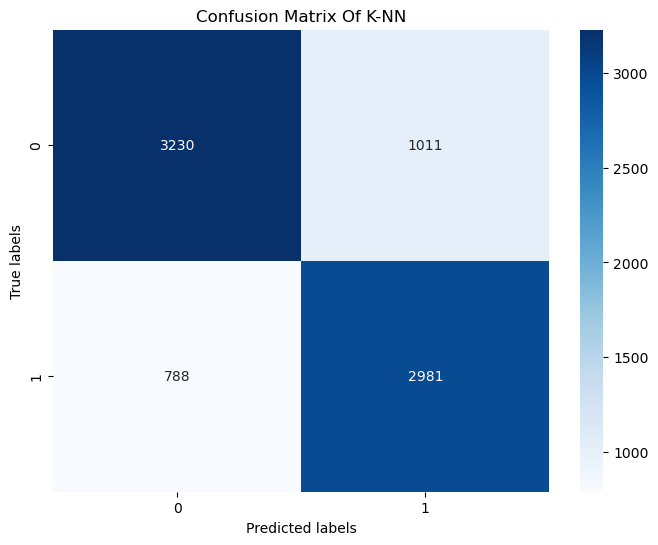

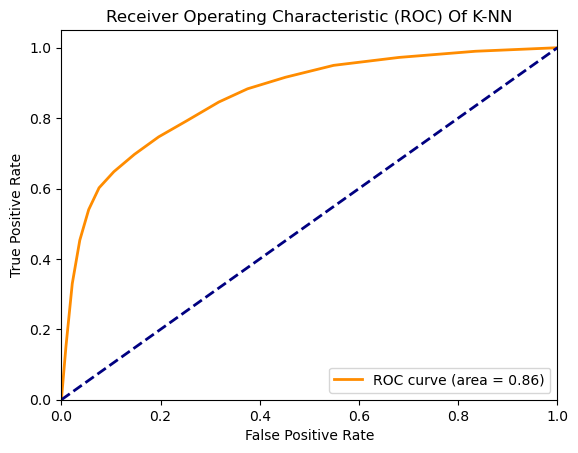

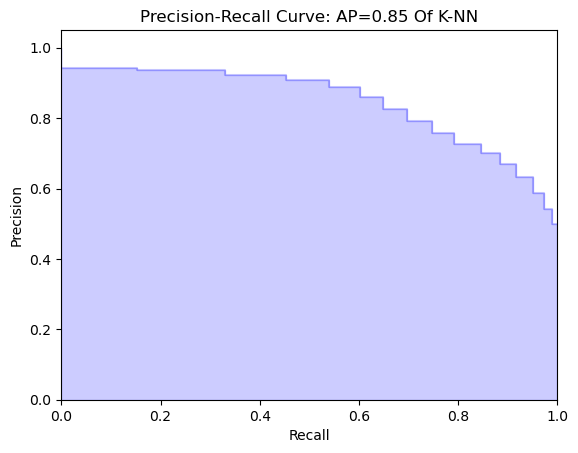

In [8]:
Knn(X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      4018
           1       0.71      0.71      0.71      3992

    accuracy                           0.71      8010
   macro avg       0.71      0.71      0.71      8010
weighted avg       0.71      0.71      0.71      8010



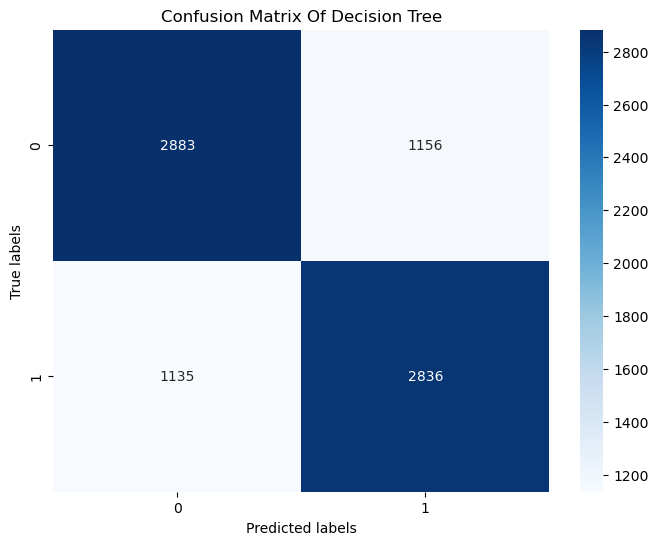

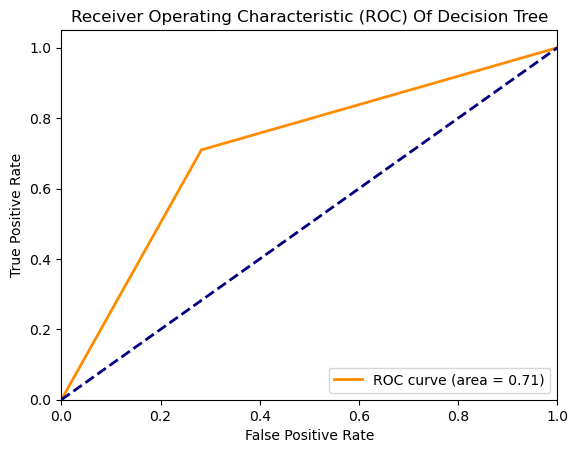

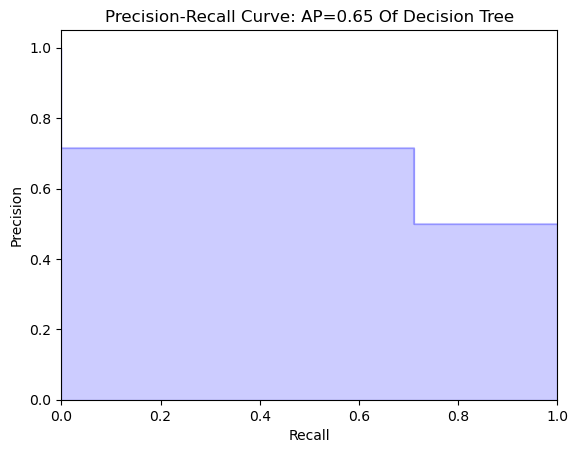

In [9]:
DecisionTree(X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      4018
           1       0.77      0.77      0.77      3992

    accuracy                           0.77      8010
   macro avg       0.77      0.77      0.77      8010
weighted avg       0.77      0.77      0.77      8010



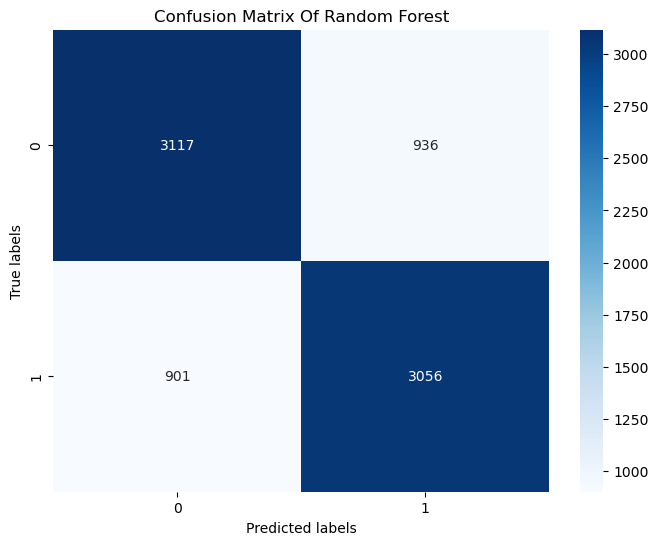

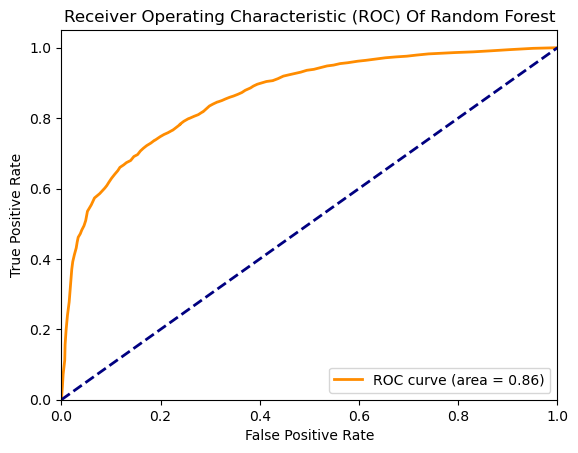

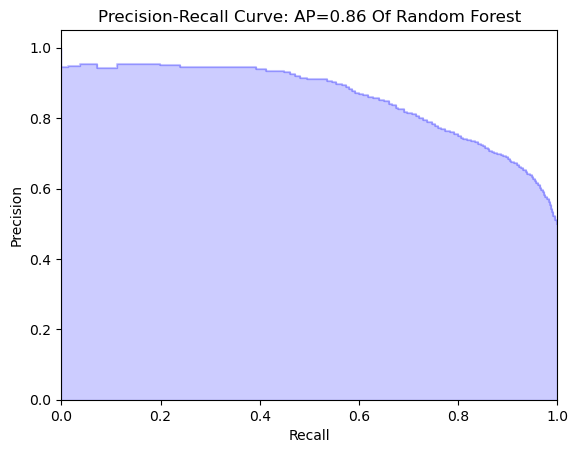

In [10]:
RandomForest(X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      4018
           1       0.82      0.75      0.79      3992

    accuracy                           0.79      8010
   macro avg       0.80      0.79      0.79      8010
weighted avg       0.80      0.79      0.79      8010



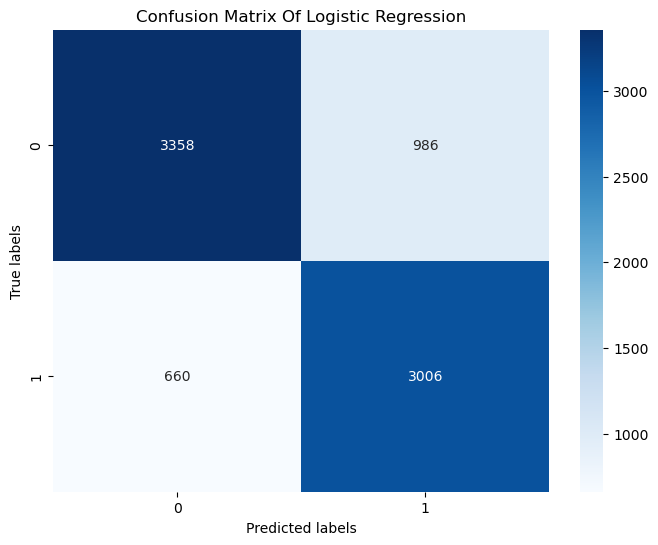

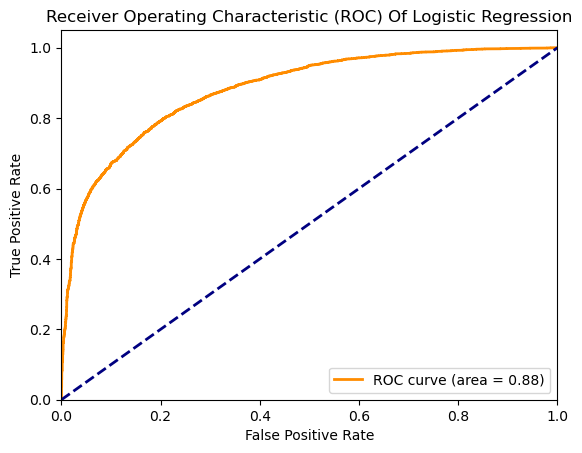

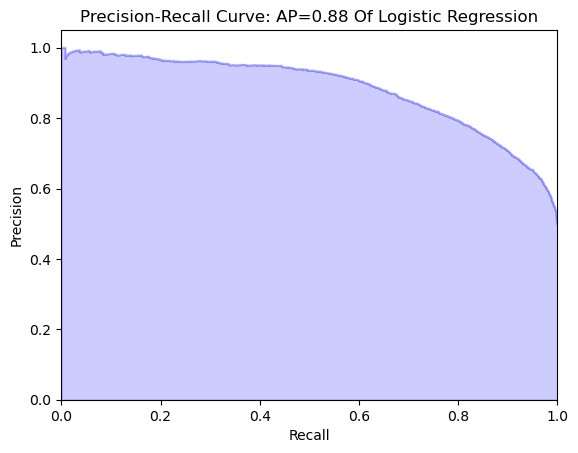

In [11]:
LogisticR(X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      4018
           1       0.80      0.74      0.77      3992

    accuracy                           0.78      8010
   macro avg       0.78      0.78      0.78      8010
weighted avg       0.78      0.78      0.78      8010



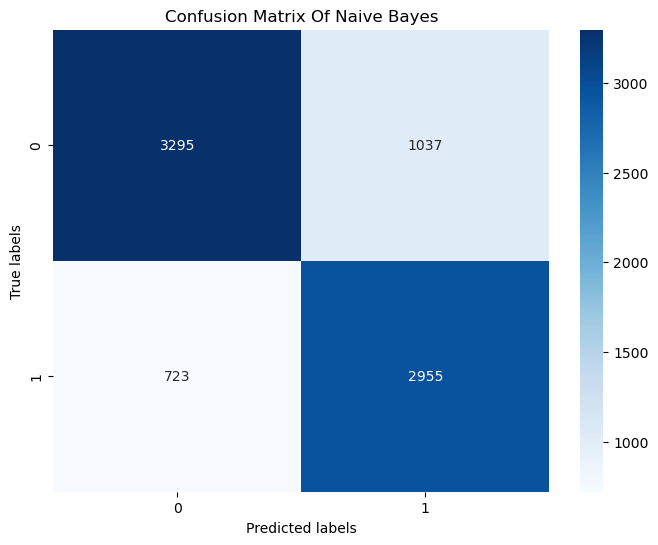

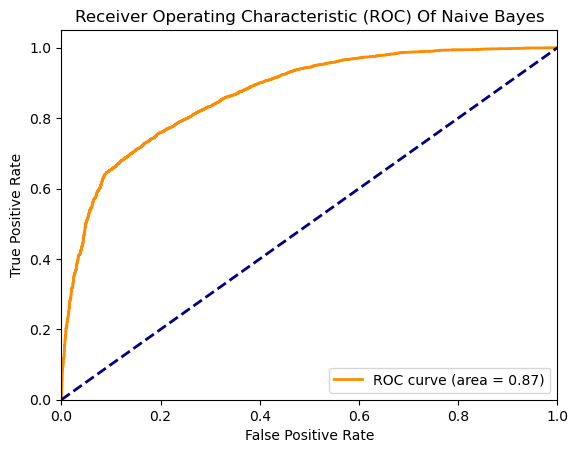

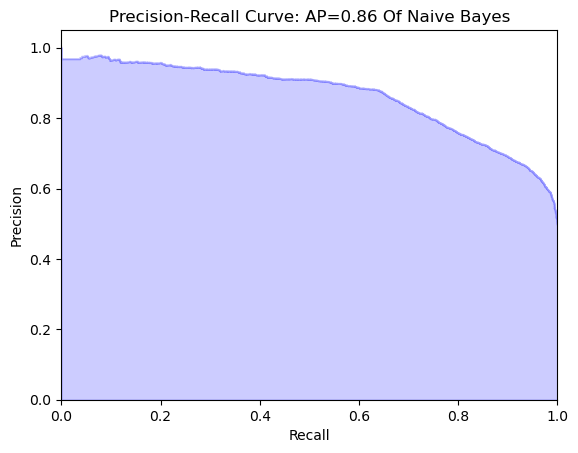

In [12]:
NaiveBayes(X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      4018
           1       0.79      0.78      0.79      3992

    accuracy                           0.79      8010
   macro avg       0.79      0.79      0.79      8010
weighted avg       0.79      0.79      0.79      8010



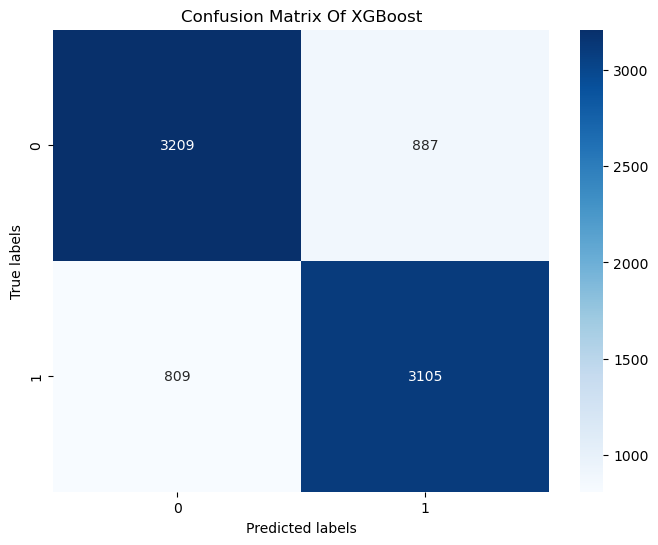

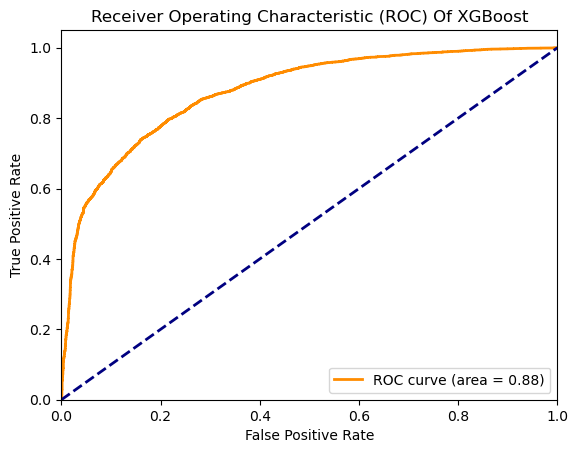

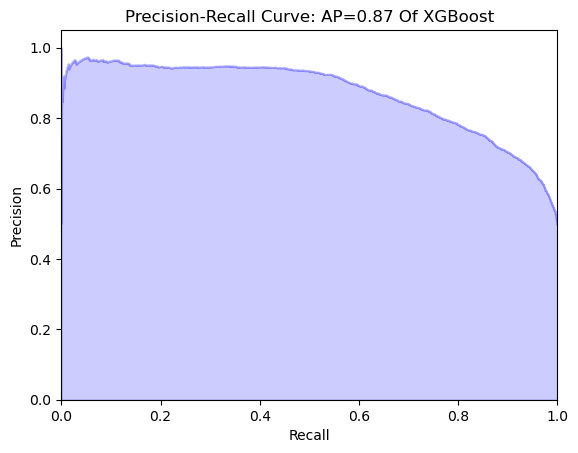

In [13]:
XGBoost(X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      4018
           1       0.79      0.79      0.79      3992

    accuracy                           0.79      8010
   macro avg       0.79      0.79      0.79      8010
weighted avg       0.79      0.79      0.79      8010



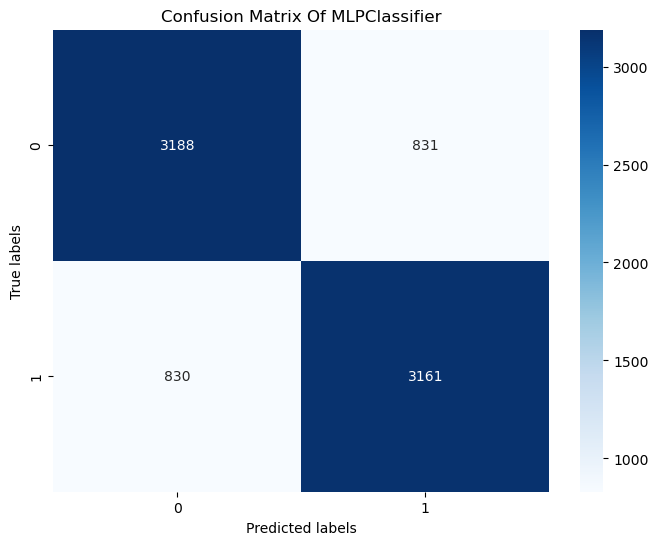

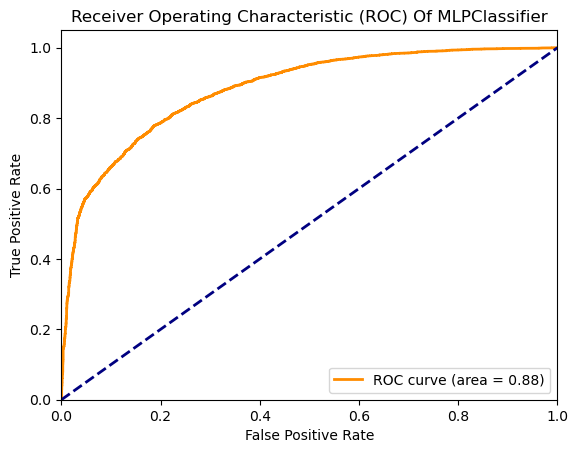

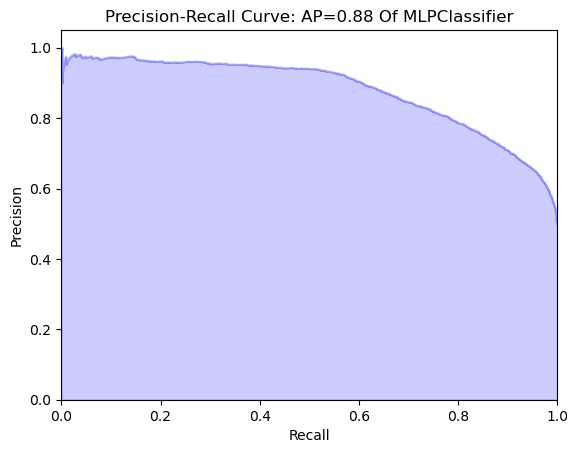

In [14]:
NeuralNetwork(X_train,y_train,X_test,y_test)

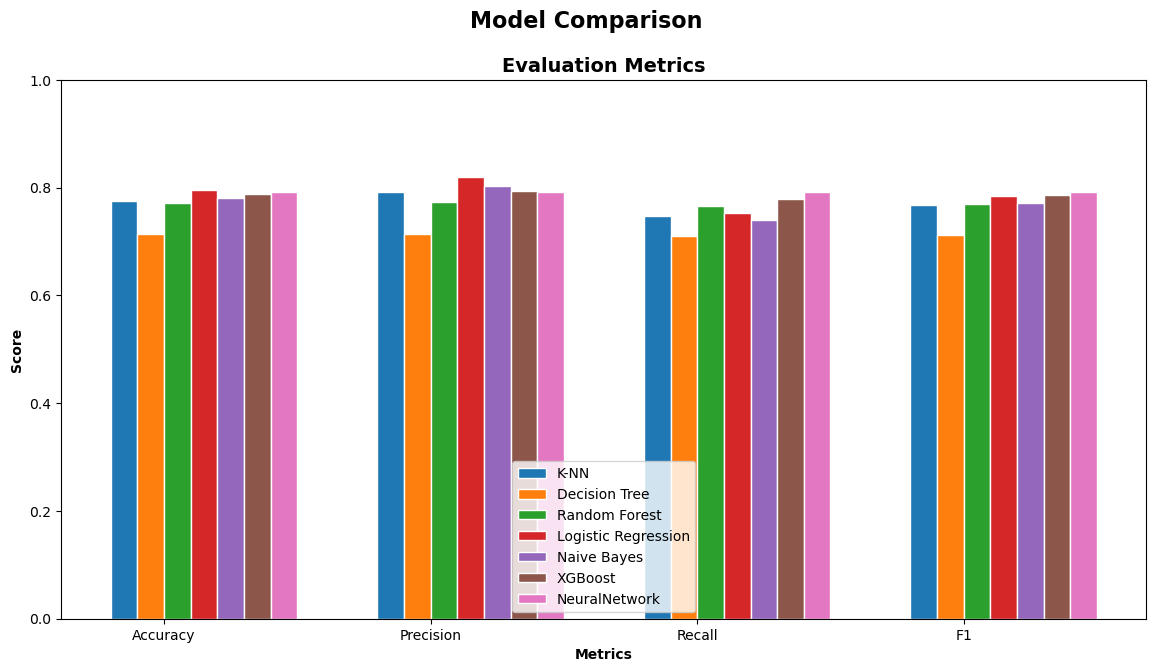

In [15]:
#comparison
barWidth = 0.1
knn_score = [knn_eval['accuracy'], knn_eval['precision'], knn_eval['recall'], knn_eval['f1']]
dtree_score = [dtree_eval['accuracy'], dtree_eval['precision'], dtree_eval['recall'], dtree_eval['f1']]
randomf_score = [randomf_eval['accuracy'], randomf_eval['precision'], randomf_eval['recall'], randomf_eval['f1']]
logisticr_score = [logisticr_eval['accuracy'], logisticr_eval['precision'], logisticr_eval['recall'], logisticr_eval['f1']]
bayes_score = [bayes_eval['accuracy'], bayes_eval['precision'], bayes_eval['recall'], bayes_eval['f1']]
xgboost_score = [xgboost_eval['accuracy'], xgboost_eval['precision'], xgboost_eval['recall'], xgboost_eval['f1']]
mlp_score = [mlp_eval['accuracy'], mlp_eval['precision'], mlp_eval['recall'], mlp_eval['f1']]
fig, (ax) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')
r1 = np.arange(len(knn_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
ax.bar(r1, knn_score, width=barWidth, edgecolor='white', label='K-NN')
ax.bar(r2, dtree_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax.bar(r3, randomf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax.bar(r4, logisticr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax.bar(r5, bayes_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax.bar(r6, xgboost_score, width=barWidth, edgecolor='white', label='XGBoost')
ax.bar(r7, mlp_score, width=barWidth, edgecolor='white', label='NeuralNetwork')
ax.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax.set_xticks([r + (barWidth * 1.5) for r in range(len(knn_score))],)
ax.set_xticklabels(labels)
ax.set_ylabel('Score', fontweight='bold')
ax.set_ylim(0, 1)
ax.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax.legend()
plt.show()